In [11]:
import shapely as shp

## 3. General

I would like to create a way to have horizontal or vertical supports without having to write a bunch of `if` and `elif` stuff.

Change the orientation from `'horz'` to `'vert'` and run notebook from top to bottom to see supports change orientation.

In [12]:
orientation = 'vert' # vert

In [13]:
horz = orientation == 'horz'
vert = orientation == 'vert'

# When horz == 1, vert == 0
# And when horz == 0, vert == 1

## 8. Anchor point

This point represents the point on the beam where the support should occur.

In essence, all support drawing should be based off of this coordinate (i.e. "drawing below" the coordinate)


In [14]:
apx, apy = 10, 10
anchor_point = ap = shp.Point([apx, apy])

## 5. Drawing supports

In [15]:
support_total_width = stw = 10 # An arbitrary value
support_height = sh = stw / 2 # An arbitrary ratio
support_width = sw = stw / 2 # An arbitrary ratio


## 2. Ground

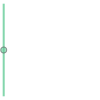

In [16]:
ground_elev = ge = horz * (apy  - sh) + vert * (apx - sh)
support_center = sc = horz * (apx) + vert * (apy)

# Embed both horizontal and vertical ordinates into one expression
x0 = horz * (sc - stw/2) + vert * ge
y0 = horz * ge + vert * (sc - stw/2)
x1 = horz * (sc + stw/2) + vert * ge
y1 = horz * ge + vert * (sc + stw/2)

support_ground = shp.LineString([[x0, y0], [x1, y1]])
ground_center = shp.Point([horz * sc + vert * ge, horz * ge + vert * sc])
shp.GeometryCollection([support_ground, ground_center])

## 1. Foreticks

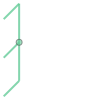

In [17]:
## This was the very first thing I coded. Then I did 2, 3, above. Then came back to this
## and realized this approach was no good. But I needed to start somewhere to realize it.

# No good, below:
# baseline = 10
# offset = 20
# minx, miny, maxx, maxy = baseline - offset, baseline - offset, baseline, baseline
# tick = shp.LineString([[minx, miny], [maxx, maxy]])
# tick

# Revised
n_ticks = 3
tick_depth = td = stw / 5 # An arbitrary ratio
tick_spacing = ts = stw / (n_ticks - 1)
tick_width = tw = td # This can be changed to suit taste, currently set to a 45 deg angle
ticks = []
for n_tick in range(n_ticks):
    # Draw line with an x-positive bias
    x0 = horz * (sc - stw/2 - tw + n_tick * ts) + vert * (ge - td)
    x1 = horz * (sc - stw/2 + n_tick * ts) + vert * (ge)
    y0 = horz * (ge - td) + vert * (sc - stw/2 - tw + n_tick * ts)
    y1 = horz * (ge) + vert * (sc - stw/2 + n_tick * ts)
    ticks.append(shp.LineString([[x0, y0], [x1, y1]]))

shp.GeometryCollection(ticks + [support_ground, ground_center])

## 4. Pin support

Drawn as an equilateral triangle

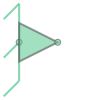

In [18]:
x0 = horz * (sc - sw / 2) + vert * (ge)
y0 = horz * (ge) + vert * (sc - sw / 2)
x1 = horz * (sc) + vert * (ge + sh)
y1 = horz * (ge + sh) + vert * (sc)
x2 = horz * (sc + sw / 2) + vert * (ge) 
y2 = horz * (ge) + vert * (sc + sw / 2)
pin = shp.Polygon([[x0, y0], [x1, y1], [x2, y2]])
shp.GeometryCollection(ticks + [support_ground, ground_center, pin, ap])


## 6. Roller support

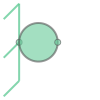

In [19]:
x0 = horz * (sc) + vert * (ge + sh / 2)
y0 = horz * (ge + sh / 2) + vert * (sc)
roller = shp.Point([x0, y0]).buffer(sh / 2)
shp.GeometryCollection(ticks + [support_ground, ground_center, roller, ap])

## 7. Fix support

In [21]:
x0 = horz * (sc - sw / 2) + vert * (ge)
y0 = horz * (ge) + vert * (sc - sw / 2)
x1 = horz * (sc + sw / 2) + vert * (ge + sh)
y1 = horz * (ge + sh) + vert * (sc + sw / 2)
fixbox = shp.box(x0, y0, x1, y1)
fixy = shp.GeometryCollection(ticks + [support_ground, ground_center, fixbox, ap])

In [26]:
for geom in fixy.geoms:
    if geom.geom_type == 'LineString':
        print(geom.xy)
    elif geom.geom_type == 'Polygon':
        print(geom.exterior.xy)

(array('d', [3.0, 5.0]), array('d', [3.0, 5.0]))
(array('d', [3.0, 5.0]), array('d', [8.0, 10.0]))
(array('d', [3.0, 5.0]), array('d', [13.0, 15.0]))
(array('d', [5.0, 5.0]), array('d', [5.0, 15.0]))
(array('d', [10.0, 10.0, 5.0, 5.0, 10.0]), array('d', [7.5, 12.5, 12.5, 7.5, 7.5]))
